# Import Libaries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE 

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Data Understanding

## Load Dataset

In [3]:
df = pd.read_csv('/Users/hayaayu/Users/hayaayu/Self Development/Data Science/Dibimbing/Day19/Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Preprocessing

## Drop Unused Feature

In [5]:
#dropping customer ID

df = df.drop(['customerID'], axis=1)

## Data Types

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Transform TotalCharges to Float

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Missing Value

In [8]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# percentage of null value
(11/7043)*100

0.1561834445548772

**Missing value** is less than 5%, means we could drop the missing values.

In [10]:
#Removing missing values 
df.dropna(how = 'any', inplace = True)

## Duplicated Value

In [11]:
df.duplicated().sum()

22

There's no duplicated value and missing value, all good to go.

## Feature Engineering/Encoding

In [12]:
# One Hot Encoding
df = df.join(pd.get_dummies(df[['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']]))

**Freq Encoding for MultipleLines**

In [13]:
# Freq Encoding for MultipleLines

freq_ml = df['MultipleLines'].value_counts().reset_index()
freq_ml.rename(columns={"index": "MultipleLines", "MultipleLines": "freq_MultipleLines"}, inplace = True)
freq_ml['pct_MultipleLines'] = round((freq_ml['freq_MultipleLines']/freq_ml['freq_MultipleLines'].sum())*100,2)
freq_ml

,MultipleLines,freq_MultipleLines,pct_MultipleLines
0,No,3385,48.14
1,Yes,2967,42.19
2,No phone service,680,9.67


In [14]:
df = df.merge(freq_ml[['MultipleLines','pct_MultipleLines']], on='MultipleLines', how='inner')
df[['MultipleLines','pct_MultipleLines']]

,MultipleLines,pct_MultipleLines
0,No phone service,9.67
1,No phone service,9.67
2,No phone service,9.67
3,No phone service,9.67
4,No phone service,9.67
...,...,...
7027,Yes,42.19
7028,Yes,42.19
7029,Yes,42.19
7030,Yes,42.19


**Frequency Encoding for InternetService**

In [15]:
# Freq Encoding for InternetService

freq_is = df['InternetService'].value_counts().reset_index()
freq_is.rename(columns={"index": "InternetService", "InternetService": "freq_InternetService"}, inplace = True)
freq_is['pct_InternetService'] = round((freq_is['freq_InternetService']/freq_is['freq_InternetService'].sum())*100,2)
freq_is

,InternetService,freq_InternetService,pct_InternetService
0,Fiber optic,3096,44.03
1,DSL,2416,34.36
2,No,1520,21.62


In [16]:
df = df.merge(freq_is[['InternetService','pct_InternetService']], on='InternetService', how='inner')
df[['InternetService','pct_InternetService']]

,InternetService,pct_InternetService
0,DSL,34.36
1,DSL,34.36
2,DSL,34.36
3,DSL,34.36
4,DSL,34.36
...,...,...
7027,No,21.62
7028,No,21.62
7029,No,21.62
7030,No,21.62


**Frequency Encoding for OnlineSecurity**

In [17]:
# Freq Encoding for OnlineSecurity

freq_os = df['OnlineSecurity'].value_counts().reset_index()
freq_os.rename(columns={"index": "OnlineSecurity", "OnlineSecurity": "freq_OnlineSecurity"}, inplace = True)
freq_os['pct_OnlineSecurity'] = round((freq_os['freq_OnlineSecurity']/freq_os['freq_OnlineSecurity'].sum())*100,2)
freq_os

,OnlineSecurity,freq_OnlineSecurity,pct_OnlineSecurity
0,No,3497,49.73
1,Yes,2015,28.65
2,No internet service,1520,21.62


In [18]:
df = df.merge(freq_os[['OnlineSecurity','pct_OnlineSecurity']], on='OnlineSecurity', how='inner')
df[['OnlineSecurity','pct_OnlineSecurity']]

,OnlineSecurity,pct_OnlineSecurity
0,No,49.73
1,No,49.73
2,No,49.73
3,No,49.73
4,No,49.73
...,...,...
7027,No internet service,21.62
7028,No internet service,21.62
7029,No internet service,21.62
7030,No internet service,21.62


**Frequency Encoding for OnlineBackup**

In [19]:
# Freq Encoding for OnlineBackup

freq_ob = df['OnlineBackup'].value_counts().reset_index()
freq_ob.rename(columns={"index": "OnlineBackup", "OnlineBackup": "freq_OnlineBackup"}, inplace = True)
freq_ob['pct_OnlineBackup'] = round((freq_ob['freq_OnlineBackup']/freq_ob['freq_OnlineBackup'].sum())*100,2)
freq_ob

,OnlineBackup,freq_OnlineBackup,pct_OnlineBackup
0,No,3087,43.90
1,Yes,2425,34.49
2,No internet service,1520,21.62


In [20]:
df = df.merge(freq_ob[['OnlineBackup','pct_OnlineBackup']], on='OnlineBackup', how='inner')
df[['OnlineBackup','pct_OnlineBackup']]

,OnlineBackup,pct_OnlineBackup
0,Yes,34.49
1,Yes,34.49
2,Yes,34.49
3,Yes,34.49
4,Yes,34.49
...,...,...
7027,No internet service,21.62
7028,No internet service,21.62
7029,No internet service,21.62
7030,No internet service,21.62


**Frequency Encoding for DeviceProtection**

In [21]:
# Freq Encoding for DeviceProtection

freq_dp = df['DeviceProtection'].value_counts().reset_index()
freq_dp.rename(columns={"index": "DeviceProtection", "DeviceProtection": "freq_DeviceProtection"}, inplace = True)
freq_dp['pct_DeviceProtection'] = round((freq_dp['freq_DeviceProtection']/freq_dp['freq_DeviceProtection'].sum())*100,2)
freq_dp

,DeviceProtection,freq_DeviceProtection,pct_DeviceProtection
0,No,3094,44.00
1,Yes,2418,34.39
2,No internet service,1520,21.62


In [22]:
df = df.merge(freq_dp[['DeviceProtection','pct_DeviceProtection']], on='DeviceProtection', how='inner')
df[['DeviceProtection','pct_DeviceProtection']]

,DeviceProtection,pct_DeviceProtection
0,No,44.00
1,No,44.00
2,No,44.00
3,No,44.00
4,No,44.00
...,...,...
7027,No internet service,21.62
7028,No internet service,21.62
7029,No internet service,21.62
7030,No internet service,21.62


**Frequency Encoding for TechSupport**

In [23]:
# Freq Encoding for TechSupport

freq_ts = df['TechSupport'].value_counts().reset_index()
freq_ts.rename(columns={"index": "TechSupport", "TechSupport": "freq_TechSupport"}, inplace = True)
freq_ts['pct_TechSupport'] = round((freq_ts['freq_TechSupport']/freq_ts['freq_TechSupport'].sum())*100,2)
freq_ts

,TechSupport,freq_TechSupport,pct_TechSupport
0,No,3472,49.37
1,Yes,2040,29.01
2,No internet service,1520,21.62


In [24]:
df = df.merge(freq_ts[['TechSupport','pct_TechSupport']], on='TechSupport', how='inner')
df[['TechSupport','pct_TechSupport']]

,TechSupport,pct_TechSupport
0,No,49.37
1,No,49.37
2,No,49.37
3,No,49.37
4,No,49.37
...,...,...
7027,No internet service,21.62
7028,No internet service,21.62
7029,No internet service,21.62
7030,No internet service,21.62


**Frequency Encoding for StreamingTV**

In [25]:
# Freq Encoding for StreamingTV

freq_st = df['StreamingTV'].value_counts().reset_index()
freq_st.rename(columns={"index": "StreamingTV", "StreamingTV": "freq_StreamingTV"}, inplace = True)
freq_st['pct_StreamingTV'] = round((freq_st['freq_StreamingTV']/freq_st['freq_StreamingTV'].sum())*100,2)
freq_st

,StreamingTV,freq_StreamingTV,pct_StreamingTV
0,No,2809,39.95
1,Yes,2703,38.44
2,No internet service,1520,21.62


In [26]:
df = df.merge(freq_st[['StreamingTV','pct_StreamingTV']], on='StreamingTV', how='inner')
df[['StreamingTV','pct_StreamingTV']]

,StreamingTV,pct_StreamingTV
0,No,39.95
1,No,39.95
2,No,39.95
3,No,39.95
4,No,39.95
...,...,...
7027,No internet service,21.62
7028,No internet service,21.62
7029,No internet service,21.62
7030,No internet service,21.62


**Frequency Encoding for StreamingMovies**

In [27]:
# Freq Encoding for StreamingMovies

freq_sm = df['StreamingMovies'].value_counts().reset_index()
freq_sm.rename(columns={"index": "StreamingMovies", "StreamingMovies": "freq_smreamingMovies"}, inplace = True)
freq_sm['pct_StreamingMovies'] = round((freq_sm['freq_smreamingMovies']/freq_sm['freq_smreamingMovies'].sum())*100,2)
freq_sm

,StreamingMovies,freq_smreamingMovies,pct_StreamingMovies
0,No,2781,39.55
1,Yes,2731,38.84
2,No internet service,1520,21.62


In [28]:
df = df.merge(freq_sm[['StreamingMovies','pct_StreamingMovies']], on='StreamingMovies', how='inner')
df[['StreamingMovies','pct_StreamingMovies']]

,StreamingMovies,pct_StreamingMovies
0,No,39.55
1,No,39.55
2,No,39.55
3,No,39.55
4,No,39.55
...,...,...
7027,No internet service,21.62
7028,No internet service,21.62
7029,No internet service,21.62
7030,No internet service,21.62


**Frequency Encoding for Contract**

In [29]:
# Freq Encoding for Contract

freq_c = df['Contract'].value_counts().reset_index()
freq_c.rename(columns={"index": "Contract", "Contract": "freq_creamingMovies"}, inplace = True)
freq_c['pct_Contract'] = round((freq_c['freq_creamingMovies']/freq_c['freq_creamingMovies'].sum())*100,2)
freq_c

,Contract,freq_creamingMovies,pct_Contract
0,Month-to-month,3875,55.11
1,Two year,1685,23.96
2,One year,1472,20.93


In [30]:
df = df.merge(freq_c[['Contract','pct_Contract']], on='Contract', how='inner')
df[['Contract','pct_Contract']]

,Contract,pct_Contract
0,Month-to-month,55.11
1,Month-to-month,55.11
2,Month-to-month,55.11
3,Month-to-month,55.11
4,Month-to-month,55.11
...,...,...
7027,Two year,23.96
7028,Two year,23.96
7029,Two year,23.96
7030,Two year,23.96


**Frequency Encoding for PaymentMethod**

In [31]:
# Freq Encoding for PaymentMethod

freq_pm = df['PaymentMethod'].value_counts().reset_index()
freq_pm.rename(columns={"index": "PaymentMethod", "PaymentMethod": "freq_pmreamingMovies"}, inplace = True)
freq_pm['pct_PaymentMethod'] = round((freq_pm['freq_pmreamingMovies']/freq_pm['freq_pmreamingMovies'].sum())*100,2)
freq_pm

,PaymentMethod,freq_pmreamingMovies,pct_PaymentMethod
0,Electronic check,2365,33.63
1,Mailed check,1604,22.81
2,Bank transfer (automatic),1542,21.93
3,Credit card (automatic),1521,21.63


In [32]:
df = df.merge(freq_pm[['PaymentMethod','pct_PaymentMethod']], on='PaymentMethod', how='inner')
df[['PaymentMethod','pct_PaymentMethod']]

,PaymentMethod,pct_PaymentMethod
0,Electronic check,33.63
1,Electronic check,33.63
2,Electronic check,33.63
3,Electronic check,33.63
4,Electronic check,33.63
...,...,...
7027,Credit card (automatic),21.63
7028,Credit card (automatic),21.63
7029,Credit card (automatic),21.63
7030,Credit card (automatic),21.63


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                7032 non-null   object 
 1   SeniorCitizen         7032 non-null   int64  
 2   Partner               7032 non-null   object 
 3   Dependents            7032 non-null   object 
 4   tenure                7032 non-null   int64  
 5   PhoneService          7032 non-null   object 
 6   MultipleLines         7032 non-null   object 
 7   InternetService       7032 non-null   object 
 8   OnlineSecurity        7032 non-null   object 
 9   OnlineBackup          7032 non-null   object 
 10  DeviceProtection      7032 non-null   object 
 11  TechSupport           7032 non-null   object 
 12  StreamingTV           7032 non-null   object 
 13  StreamingMovies       7032 non-null   object 
 14  Contract              7032 non-null   object 
 15  PaperlessBilling     

## Multicollinearity Study

<Axes: >

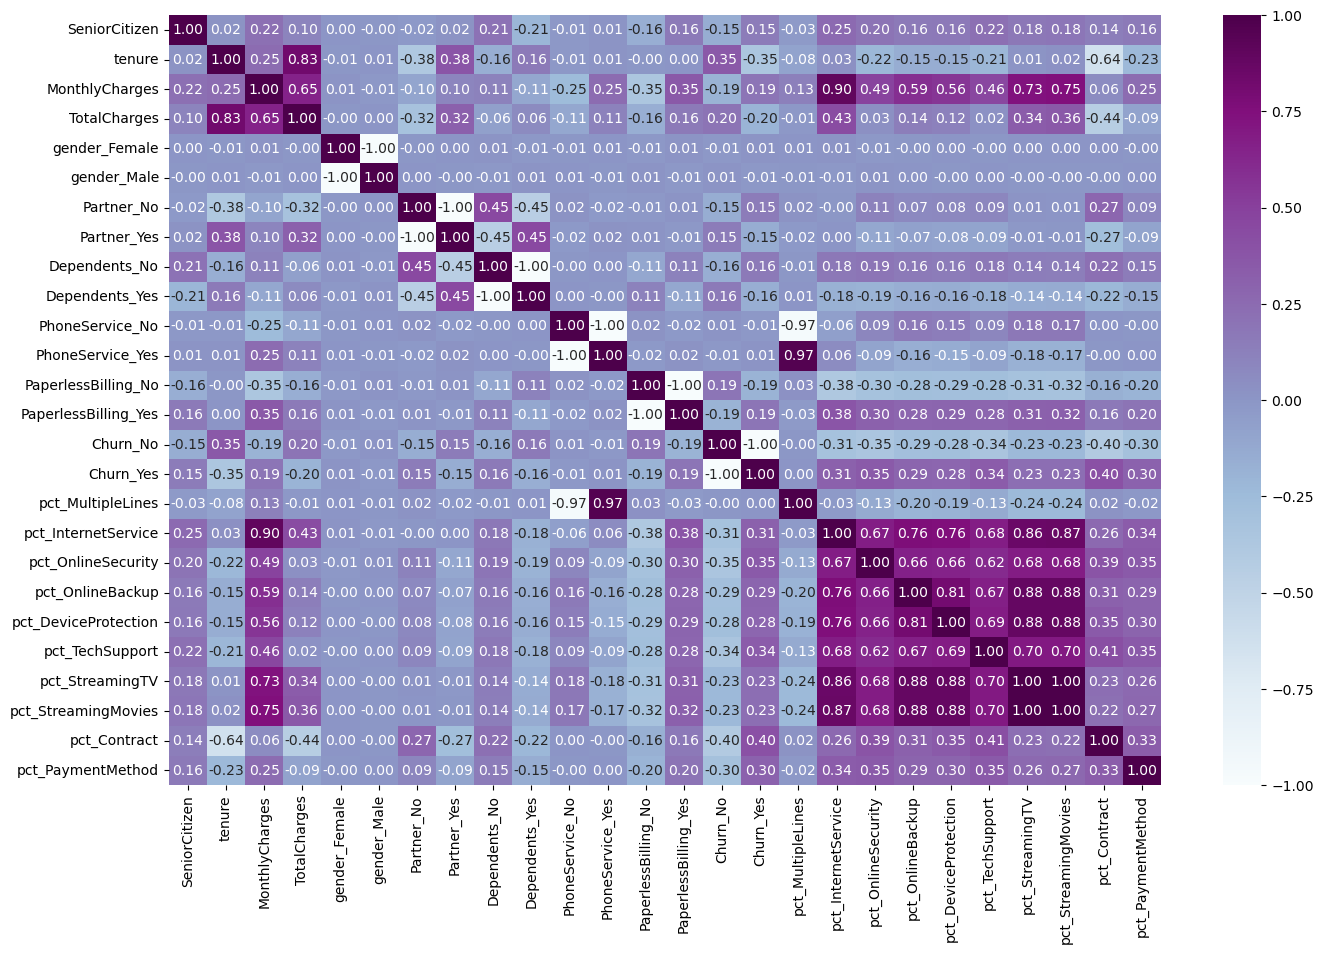

In [34]:
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

- `MultipleLines` with `PhoneService` 0.97, we're gonna drop `PhoneService`
- `MonthlyCharges` and `InternetService`, we're gonna drop `MonthlyCharges`
- `TotalCharges` and `tenure`, we're gonna drop `TotalCharges`
- `OnlineBackup`,`DeviceProtection`,`StreamingTV`,`Streaming Movies`, we're gonna hold `OnlineBackup`

In [35]:
df = df.drop(['PhoneService_Yes','PhoneService_No','MonthlyCharges','TotalCharges','pct_DeviceProtection','pct_StreamingTV','pct_StreamingMovies','gender_Female','gender_Male','Partner_No','Dependents_No','PaperlessBilling_No','Churn_No'], axis=1)

## Outlier Handling

In [36]:
# group column names based on type
# it will make our life easier onwards

numericals = ['tenure','SeniorCitizen','Partner_Yes', 'Dependents_Yes','PaperlessBilling_Yes','Churn_Yes', 'pct_MultipleLines', 'pct_InternetService',
       'pct_OnlineSecurity', 'pct_OnlineBackup','pct_TechSupport','pct_Contract', 'pct_PaymentMethod']

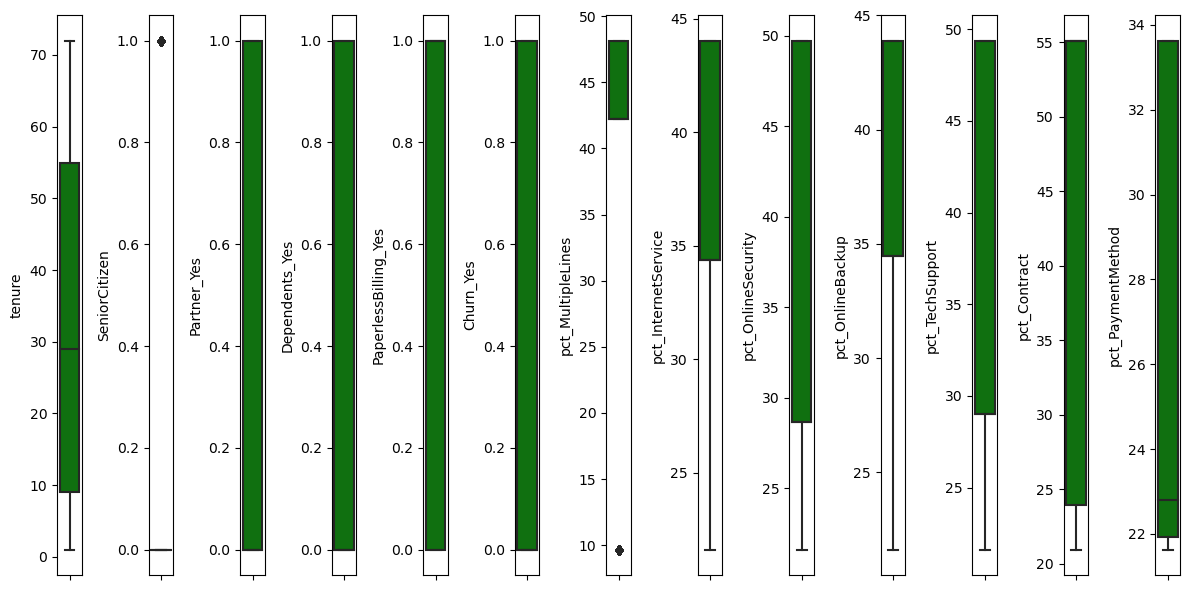

In [37]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green')
    plt.tight_layout()

## Finalizing Datasets

In [38]:
df2 = df.copy()
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Dependents_Yes,PaperlessBilling_Yes,Churn_Yes,pct_MultipleLines,pct_InternetService,pct_OnlineSecurity,pct_OnlineBackup,pct_TechSupport,pct_Contract,pct_PaymentMethod
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,0,1,0,9.67,34.36,49.73,34.49,49.37,55.11,33.63
1,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,...,1,0,1,9.67,34.36,49.73,34.49,49.37,55.11,33.63
2,Female,1,No,No,5,No,No phone service,DSL,No,Yes,...,0,0,1,9.67,34.36,49.73,34.49,49.37,55.11,33.63
3,Male,0,Yes,Yes,9,No,No phone service,DSL,No,Yes,...,1,1,1,9.67,34.36,49.73,34.49,49.37,55.11,33.63
4,Female,0,No,Yes,13,No,No phone service,DSL,No,Yes,...,1,0,0,9.67,34.36,49.73,34.49,49.37,55.11,33.63


In [39]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn', 'Partner_Yes', 'Dependents_Yes', 'PaperlessBilling_Yes',
       'Churn_Yes', 'pct_MultipleLines', 'pct_InternetService',
       'pct_OnlineSecurity', 'pct_OnlineBackup', 'pct_TechSupport',
       'pct_Contract', 'pct_PaymentMethod'],
      dtype='object')

In [40]:
df2 = df2.drop(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'], axis=1)

## Split Datasets

In [41]:
X = df2.drop('Churn_Yes', axis=1)
y = df2['Churn_Yes']

In [42]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

## Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

scale_X = StandardScaler()

#X_train = scale_X.fit_transform(X_train)
#X_test = scale_X.transform(X_test)

# Modelling

## Decision Tree

### Fit-Train

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

### Predict

In [45]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1, 0, 1, ..., 1, 1, 0], dtype=uint8)

### Evaluation

In [61]:
print('Accuracy',accuracy_score(y_test, y_pred_dt))

Accuracy 0.7336492890995261


## Random Forest

### Fit-Train

In [47]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Predict

In [48]:
y_pred_rf = model.predict(X_test)

### Evaluation

In [60]:
print('Accuracy',accuracy_score(y_test, y_pred_rf))

Accuracy 0.771563981042654


## XGBoost

### Fit-Train

In [57]:
import xgboost as xgb

clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Predict

In [58]:
y_pred_xgb = clf.predict(X_test)

### Evaluation

In [59]:
print('Accuracy',accuracy_score(y_test, y_pred_xgb))

Accuracy 0.7777251184834123


## Notes:

- Personally, I would choose Random Forest since its versatile, flexible, and easy to use.
- Not to mention, Random Forest also produce great result even without hyperparameter tuning.
- Compared to more complex model like XGBoost, Random Forest produces similiar result. Therefore, no need to use more complex model.